# Libraries

In [20]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Information

In [21]:
calorie_file_id = '1dy0mrybsM-gvFyYm1b3cUA78q4tvXRay'
calorie_output_file = 'Dataset3/calories.csv'
calorie_download_url = f'https://drive.google.com/uc?id={calorie_file_id}'
gdown.download(calorie_download_url, calorie_output_file, quiet=False)
df_calorie = pd.read_csv(calorie_output_file)

exercise_file_id = '1snr5rZ2vYCw7oRVN98OXMG-hh_5NSEo9'
exercise_output_file = 'Dataset3/exercise.csv'
exercise_download_url = f'https://drive.google.com/uc?id={exercise_file_id}'
gdown.download(exercise_download_url, exercise_output_file, quiet=False)
df_exercise = pd.read_csv(exercise_output_file)

Downloading...
From: https://drive.google.com/uc?id=1dy0mrybsM-gvFyYm1b3cUA78q4tvXRay
To: c:\Users\firma\Documents\Python\Bangkit\Capstone\Daily Activity Estimation\Dataset3\calories.csv
100%|██████████| 230k/230k [00:00<00:00, 339kB/s]
Downloading...
From: https://drive.google.com/uc?id=1snr5rZ2vYCw7oRVN98OXMG-hh_5NSEo9
To: c:\Users\firma\Documents\Python\Bangkit\Capstone\Daily Activity Estimation\Dataset3\exercise.csv
100%|██████████| 677k/677k [00:01<00:00, 569kB/s]


## Calories

In [22]:
df_calorie.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [23]:
df_calorie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


## Exercise

In [24]:
df_exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [25]:
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [26]:
variables = [col for col in df_exercise.columns if df_exercise[col].nunique() <= 10]
for var in variables:
  print(f"====={var}=====")
  unique_values = df_exercise[var].unique()
  n_unique_values = df_exercise[var].nunique()
  value_counts = df_exercise[var].value_counts()

  print(f"Unique values in {var}: {unique_values}")
  print(f"Number of unique values in {var}: {n_unique_values}")
  print(f"Value counts in {var}:\n{value_counts}\n")

=====Gender=====
Unique values in Gender: ['male' 'female']
Number of unique values in Gender: 2
Value counts in Gender:
Gender
female    7553
male      7447
Name: count, dtype: int64



# Data Cleaning

In [27]:
df = pd.concat([df_exercise,df_calorie['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Drop Columns

In [28]:
df.drop(columns = ['User_ID'], inplace=True)

# Data Preprocessing

## Encoding

In [29]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


## Standard Scaler

In [30]:
# num_columns = [col for col in df.columns if col not in ['User_ID', 'Calories']]
# ss = StandardScaler()

# df[num_columns] = ss.fit_transform(df[num_columns])
# df.head()

# Data Modeling

In [31]:
features = [col for col in df.columns if col not in ['User_ID', 'Calories']]
target = 'Calories'

X = df[features]
y = df[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

## NN Model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation=None),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=['mae']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [34]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=0.001, verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=100,  
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr]  
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 9069.8848 - mae: 78.3401 - val_loss: 693.4573 - val_mae: 23.5174 - learning_rate: 5.0000e-04
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 905.2527 - mae: 23.9522 - val_loss: 809.5508 - val_mae: 25.5063 - learning_rate: 5.0000e-04
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 589.9539 - mae: 19.0832 - val_loss: 104.4136 - val_mae: 8.2626 - learning_rate: 5.0000e-04
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 440.4720 - mae: 16.1740 - val_loss: 60.9770 - val_mae: 6.2857 - learning_rate: 5.0000e-04
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 352.9836 - mae: 14.1396 - val_loss: 27.4377 - val_mae: 3.8098 - learning_rate: 5.0000e-04
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 336.9852 - mae: 13.6407 - val_loss: 84.3305 - val_mae: 7.6702 - learning_rate: 5.0000e-04
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 368.0419 - mae: 14.0763 - v

# Model Evaluation

In [35]:
y_pred = model.predict(X_test)

y_pred = y_pred.flatten()
y_test = y_test.to_numpy().flatten()

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE: 4.1137157508532205
MSE: 24.00064416192702
MAPE: 14.48884539831943%


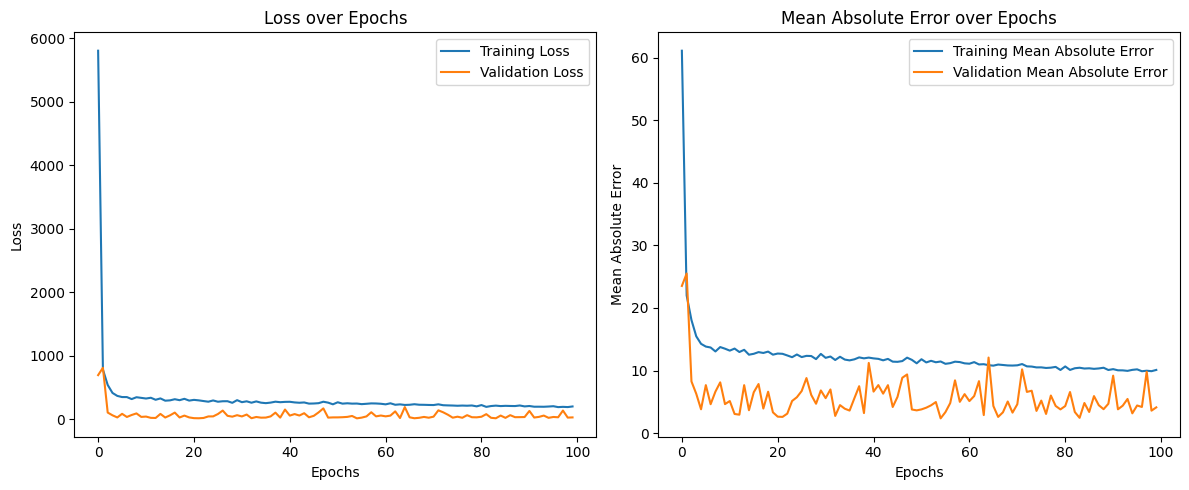

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, metric, title in zip(axes.flatten(), ['loss', 'mae'], ['Loss', 'Mean Absolute Error']):
    ax.plot(history.history[metric], label=f'Training {title}')
    ax.plot(history.history[f'val_{metric}'], label=f'Validation {title}')
    ax.set_title(f'{title} over Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(title)
    ax.legend()
    
plt.tight_layout()
plt.show()

# Save Model

In [37]:
# model.save('Activity_Calories_Prediction model.h5')

# Predict

In [38]:
new_data = np.array([
    [1, 68, 190.0, 94.0, 29.0, 105.0, 40.8],  
    [0, 20, 166.0, 60.0, 14.0, 94.0, 40.3], 
    [1, 69, 179.0, 79.0, 5.0, 88.0, 38.7],   
    [0, 34, 179.0, 71.0, 13.0, 100.0, 40.5],
    [0, 27, 154.0, 58.0, 10.0, 81.0, 39.8]  
])

predictions = model.predict(new_data)

for i, prediction in enumerate(predictions):
    print(f"Data {i+1}:")
    print("Predicted Calories:", prediction[0]) 
    print('-' * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Data 1:
Predicted Calories: 227.99641
------------------------------
Data 2:
Predicted Calories: 71.03016
------------------------------
Data 3:
Predicted Calories: 30.443066
------------------------------
Data 4:
Predicted Calories: 77.62048
------------------------------
Data 5:
Predicted Calories: 40.56338
------------------------------
